# Pytorch

# Plan de cours

- Les bases de PyTorch  
  - Définition et avantages  
  - TensorFlow vs PyTorch 
  - Tensors  
  - Autograd  
- Mettre en place un pipeline de DL : `torch.nn`, `torch.optim`  
- Construire un RN : `torch.nn.Module`  
- DL avancé, architecture préentraînée : `torchvision`


## Les bases de PyTorch


**PyTorch** est une bibliothèque logicielle Python open source d'apprentissage automatique qui s'appuie sur Torch, développée par Meta en 2016.

PyTorch permet de:

- manipuler des tenseurs (tableaux multidimensionnels)
- d'effectuer des calculs efficaces sur CPU ou GPU. [plus de détails](https://pytorch.org/docs/stable/tensor_attributes.html#torch.device)

- calculer des gradients pour appliquer facilement des algorithmes d'optimisation par descente de gradient

- PyTorch utilise la bibliothèque autograd

- Écosystème riche, modules intégrés comme TorchVision (images), TorchText (texte), et TorchAudio (audio)
- Intégration facile avec des outils populaires (Hugging Face, fastai)
- Idéal pour recherche et production, outils comme TorchServe et TorchScript pour le déploiement en production.


In [ ]:
#pip install torch
#pip install torchvision
#pip install  torchviz

import torch
dtype = torch.float
device = torch.device("cpu") # Tous les calculs seront exécutés sur le processeur

device = torch.device("cuda:0")  # Tous les calculs seront exécutés sur la carte graphique

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #Vérifier si CUDA est disponible 


### TensorFlow vs PyTorch 

**TensorFlow** (Define-and-Run) 

Utilise un graphe statique : le modèle est entièrement défini avant l’exécution. Les dimensions des entrées et la structure du réseau sont figées, ce qui limite la flexibilité et complique le débogage.

**PyTorch** (Define-by-Run) 

Repose sur un graphe dynamique : le graphe est construit à l’exécution et peut changer à chaque itération. Les structures de contrôle Python sont directement intégrées, rendant le développement plus intuitif.

**Exemple:** 

On veut traiter des phrases mot par mot avec un RNN.

Phrase A : « Salut » → 1 mot

Phrase B : « PyTorch est génial » → 3 mots

- Graphe statique (ancien TensorFlow):Le modèle doit avoir une longueur fixe, par exemple 3 mots.

Phrase A devient :« Salut, 0, 0 » (padding)

Phrase B reste :« PyTorch, est, génial »

Le réseau fait 3 calculs dans les deux cas, même quand il n’y a qu’un seul mot(Calculs inutiles, données artificielles).

- Graphe dynamique (PyTorch):Le modèle s’adapte à la phrase au moment de l’exécution

Phrase A → 1 étape de calcul

Phrase B → 3 étapes de calcul

### Création et manipulation des tensors

**Qu'est-ce qu'un Tensor?**

Un tensor est une structure de données multidimensionnelle qui peut contenir des données de types variés (floats, entiers, etc.) et effectuer des calculs de manière efficace.

Dans PyTorch, Les tensors sont le bloc de construction permettant de représenter des entrées, des poids et des sorties des modèles.

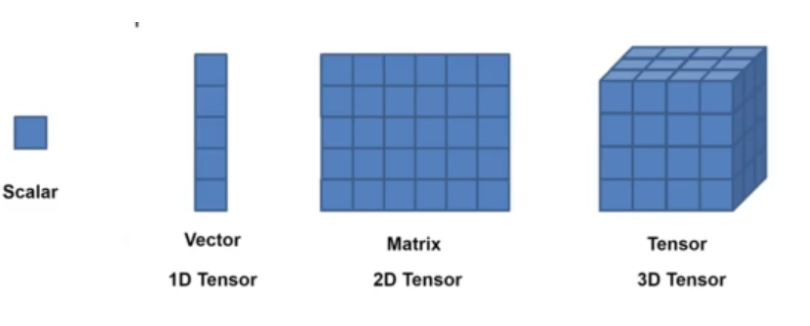

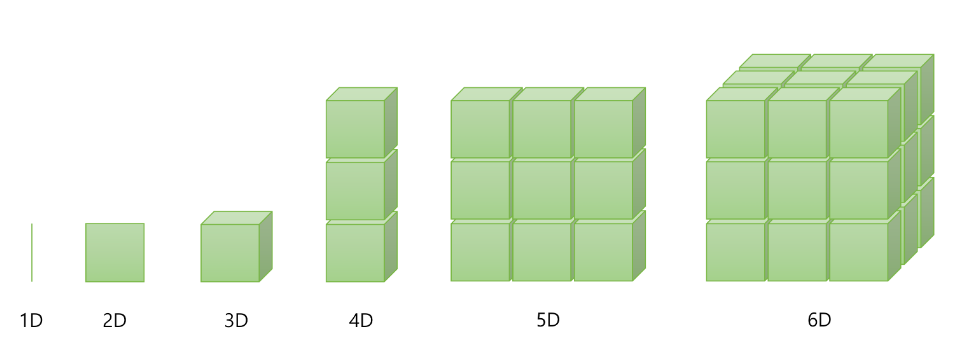

**Création des tensors**

In [47]:
# Tensor de zéros
tensor_zeros = torch.zeros(3, 3)
print(tensor_zeros)
print(type(tensor_zeros))

# Tensor de uns
tensor_ones = torch.ones(2, 4) 
print(tensor_ones)

# Tensor avec des valeurs aléatoires
tensor_random = torch.rand(2, 3, dtype=torch.float64) 
print(tensor_random)

tensor_random_int64 = tensor_random.to(torch.int64)
print(tensor_random_int64)

# tensor de type bool
tensor_bool = torch.tensor([True, False, True, False], dtype=torch.bool)

print(tensor_bool)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<class 'torch.Tensor'>
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0.8150, 0.8381, 0.5177],
        [0.6871, 0.3039, 0.8505]], dtype=torch.float64)
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([ True, False,  True, False])


In [48]:
# Tensor avec une distribution normale (moyenne=0, écart-type=1)
tensor_normal = torch.randn(4, 4) 
print(tensor_normal)

# Créer un tensor avec une séquence d'entiers
tensor_range = torch.arange(0, 10, 2)  
print(tensor_range)

# Créer un tensor avec des valeurs espacées régulièrement
tensor_linspace = torch.linspace(0, 1, steps=5)  # 5 valeurs entre 0 et 1
print(tensor_linspace)

tensor([[-0.8415,  1.0252, -0.9224, -0.0243],
        [ 0.2995,  1.8261,  0.5376,  0.0070],
        [ 0.1114,  0.0449,  0.8131, -0.7099],
        [-0.5593, -0.2598, -0.9463,  0.2481]])
tensor([0, 2, 4, 6, 8])
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


**Manipulation des tensors**

Vérifier les dimensions d'un Tensor

**Exercice**: 

1. Créer un tenseur nommé `mon_tenseur` contenant une séquence d’entiers de 0 à 23 inclus, en utilisant la fonction `arange`.

2. Redimensionner ce tenseur afin qu’il prenne la forme de 4 lignes et 6 colonnes.

3. Afficher :
   - la taille du tenseur,
   - le type de données associé.

4. Multiplier l’ensemble des valeurs du tenseur par **10**, puis afficher le résultat final.


In [49]:
tensor = torch.rand(3, 4)
print(tensor.shape)  


torch.Size([3, 4])


Le tenseur aléatoire utilise torch.manual_seed() pour garantir la reproductibilité, utile en recherche. Cela fixe la graine du générateur aléatoire.

In [ ]:
torch.manual_seed(1729)
tensor_random = torch.rand(4, 3)
print(tensor_random)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


Accéder aux éléments d’un Tensor

In [51]:
print(tensor_random)
element = tensor_random[0, 1]  # Premier rang, deuxième colonne
print(f"L'element à la premiere ligne et deuxième colonne:", element)

sub_tensor = tensor_random[:, 0]  # Première colonne entière
print(f"La première colonne entière:", sub_tensor)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
L'element à la premiere ligne et deuxième colonne: tensor(0.3791)
La première colonne entière: tensor([0.3126, 0.0736, 0.2332, 0.9927])


**Opérations sur les Tensors**

In [52]:
# Addition, soustraction, multiplication, division
tensor_a = torch.tensor([[1, 2, 3],[4, 5, 6]])
tensor_b = torch.tensor([1, 0, 2])

tensor_a_add_b = tensor_a + tensor_b  
tensor_a_mult_b = tensor_a * tensor_b  


print(tensor_a_add_b)
print(tensor_a_mult_b)
print(tensor_a + 5)
print(tensor_a * 2)

tensor([[2, 2, 5],
        [5, 5, 8]])
tensor([[ 1,  0,  6],
        [ 4,  0, 12]])
tensor([[ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])


In [53]:
a = torch.rand(2, 3)
b = torch.rand(3, 2)

#print(a * b)

Souvent, lorsque vous effectuez des opérations sur deux ou plusieurs tenseurs, ils doivent avoir la même forme c'est-à-dire le même nombre de dimensions et le même nombre d'éléments dans chaque dimension. Pour cela, nous avons les méthodes `torch.*_like()`.


In [54]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[-2.4270e-35,  1.6479e-42,  7.1337e-05],
         [ 1.8345e+00,  1.2023e-37,  1.7544e+00]],

        [[-1.0687e+22,  1.7968e+00, -1.6549e+18],
         [ 1.6519e+00, -1.6372e+37,  1.8376e+00]]])
torch.Size([2, 2, 3])
tensor([[[-2.4268e-35,  1.6479e-42,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.5062, 0.8469, 0.2588],
         [0.2707, 0.4115, 0.6839]],

        [[0.0703, 0.5105, 0.9451],
         [0.2359, 0.1979, 0.3327]]])


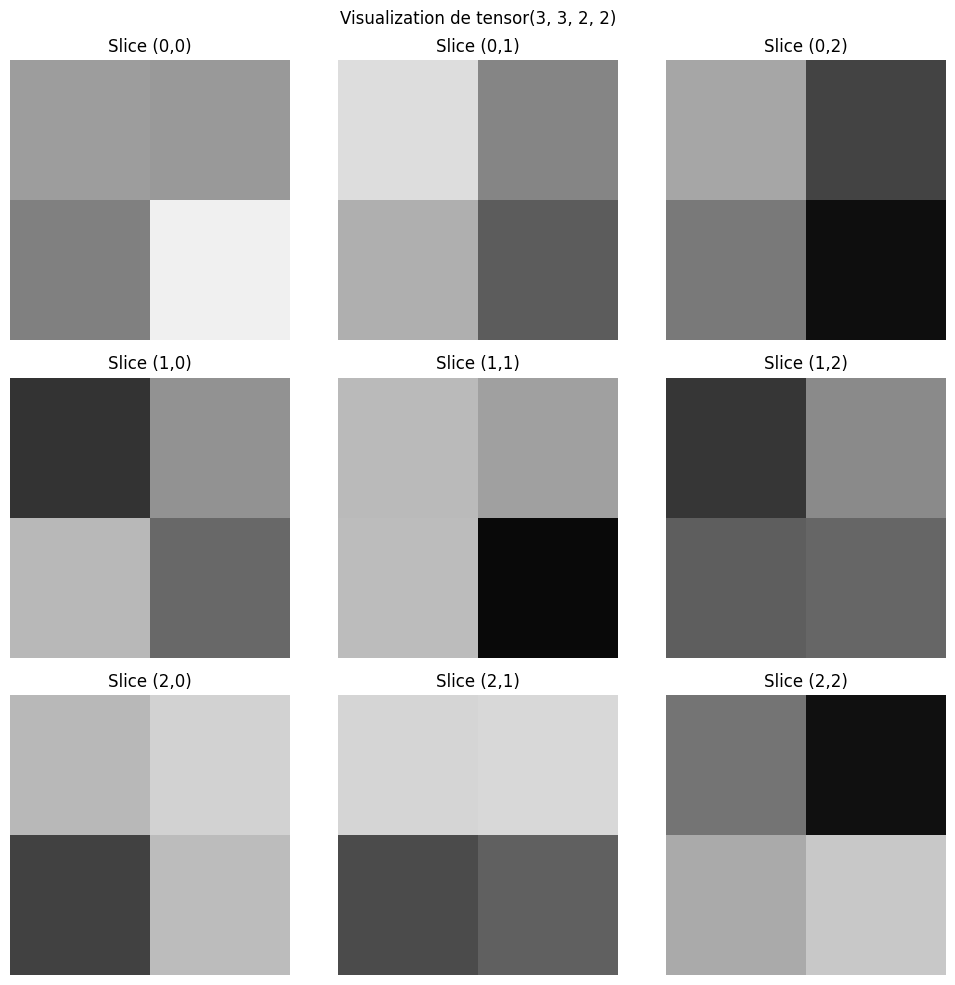

In [55]:
import matplotlib.pyplot as plt

tensor = torch.rand(3, 3, 2, 2)

# Visualiser le tenseur
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(tensor[i, j].numpy(), cmap="gray", vmin=0, vmax=1)
        axes[i, j].set_title(f"Slice ({i},{j})")
        axes[i, j].axis("off")

plt.suptitle("Visualization de tensor(3, 3, 2, 2)")
plt.tight_layout()
plt.show()

## Autograd

Autograd est la fonctionnalité de PyTorch qui permet de suivre et de calculer automatiquement les gradients des tensors nécessaires lors de l'entraînement des modèles de machine learning

In [56]:
import torch

# Créer des tensors
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x ** 2  
z = y.sum()  

print(x)
print(y)
print(z)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor(14., grad_fn=<SumBackward0>)


En ajoutant `requires_grad=True`, tu dis à PyTorch : "Garde une trace de tout ce qui arrive à ce tenseur." PyTorch va alors construire en arrière-plan un graphe de calcul qui relie x à y, puis y à z.

**Exercice**: Afficher le graphe de suivi de tensor x (utiliser torchviz)

**La rétropropagation (Backpropagation): calcul de gradient**

In [92]:
# Exemple avec des fonctions de base
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x**2 + 3  
z = x**2 + x

y_sum = y.sum()  
y_sum.backward()  # Calculer les gradients de y par rapport à x

x.grad.zero_()
z.sum().backward()

print(x.grad)  # Affiche les gradients

tensor([3., 5., 7.])




Après le premier `backward()` pour `y` :

Le gradient de $ y = x^2 + 3$ par rapport à $ x $ est :  
$$
\frac{\partial y}{\partial x} = 2x
$$  


## L’anatomie d’un projet PyTorch



Un projet PyTorch repose généralement sur **quatre composants fondamentaux** :

-  Dataset et DataLoader: ils assurent le chargement, la préparation et l’itération des données.  
Le `Dataset` définit comment accéder à un échantillon, tandis que le `DataLoader` gère le découpage en mini-lots (batches), le mélange des données et le parallélisme.

- Architecture du modèle (`nn.Module`): le modèle est implémenté sous forme de classe héritant de `nn.Module`, dans laquelle sont définies les couches du réseau et la propagation avant (*forward pass*).

-  Fonction de perte (*Loss Function*): elle quantifie l’erreur entre les prédictions du modèle et les valeurs réelles, fournissant un signal d’apprentissage  
(ex. `CrossEntropyLoss`, `MSELoss`).

-  Optimiseur: l’optimiseur met à jour les **paramètres du modèle** à partir du gradient de la perte  
(ex. `SGD`, `Adam`).


## Préparation des données avec  `Dataloader`

**Les données:**

- **FashionMNIST**: des images de vêtements et d'accessoires, chaque image étant de taille 28x28 pixels en niveaux de gris.

- **10 classes** : T-shirt, pantalon, pull, robe, manteau, sandale, chemise, basket, sac à main, bottes (0, 1,...,9)

- **60 000** images d'entraînement et **10 000** images de test.

In [61]:
# Téléchargement des données d'entraînement à partir de FashionMNIST
training_data = datasets.FashionMNIST(
    root= "data",
    train= True,
    download= True,
    transform= ToTensor()
)


# Téléchargement des données de test à partir de FashionMNIST
test_data = datasets.FashionMNIST(
    root= "data",
    train= False,
    download= True,
    transform= ToTensor()
)


In [62]:
batch_size = 10

# Créer des data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Affichage des informations sur les datasets
print("Le nombre d'images dans l'ensemble d'entraînement est :", len(train_dataloader) * batch_size)
print("Le nombre d'images dans l'ensemble de test est :", len(test_dataloader) * batch_size)
print("Le nombre de lots par époque est :", len(train_dataloader))
print("Le nombre de lots par époque est :", len(test_dataloader))

Le nombre d'images dans l'ensemble d'entraînement est : 60000
Le nombre d'images dans l'ensemble de test est : 10000
Le nombre de lots par époque est : 6000
Le nombre de lots par époque est : 1000


In [63]:
# Parcourir le test_dataloader
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")  #C: 1 pour une image en niveaux de gris et 3 pour RGB
    print(f"Shape of y: {y.shape} {y.dtype}")
    print(y)
    print(f"Valeur pixel max : {X.max():.2f}")
    print(f"Valeur pixel min : {X.min():.2f}")
    break  


Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
Valeur pixel max : 1.00
Valeur pixel min : 0.00


*Exemple de données csv*

In [64]:
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris')
features = iris.drop('species', axis=1).values
target = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values


scaler = StandardScaler()
features = scaler.fit_transform(features)

tensor_features = torch.tensor(features, dtype=torch.float32)
tensor_target = torch.tensor(target, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(tensor_features, tensor_target, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for batch, (data, target) in enumerate(train_loader):
    print(f"Batch {batch+1}:")
    print("Données :", data)
    print("Cibles :", target)
    


Batch 1:
Données : tensor([[ 1.7650e+00, -3.6218e-01,  1.4448e+00,  7.9067e-01],
        [-5.2506e-02,  2.1700e+00, -1.4539e+00, -1.3154e+00],
        [ 1.4015e+00,  3.2841e-01,  5.3541e-01,  2.6414e-01],
        [ 2.2497e+00, -5.9237e-01,  1.6722e+00,  1.0539e+00],
        [-5.2506e-02, -8.2257e-01,  7.6276e-01,  9.2230e-01],
        [-4.1601e-01, -1.0528e+00,  3.6490e-01,  8.7755e-04],
        [ 4.3217e-01,  7.8881e-01,  9.3327e-01,  1.4488e+00],
        [-1.5065e+00,  7.8881e-01, -1.3402e+00, -1.1838e+00],
        [ 5.5333e-01, -8.2257e-01,  6.4908e-01,  7.9067e-01],
        [-1.2642e+00,  7.8881e-01, -1.2266e+00, -1.3154e+00],
        [ 3.1100e-01, -3.6218e-01,  5.3541e-01,  2.6414e-01],
        [ 9.1684e-01, -3.6218e-01,  4.7857e-01,  1.3251e-01],
        [ 1.6438e+00, -1.3198e-01,  1.1606e+00,  5.2741e-01],
        [ 5.5333e-01,  5.5861e-01,  1.2743e+00,  1.7121e+00],
        [-1.7367e-01, -5.9237e-01,  1.9438e-01,  1.3251e-01],
        [-6.5835e-01,  1.4794e+00, -1.2834e+00, -1.

## Mettre en place un modèle RN

### Classe [Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

Classe de base pour tous les modules de réseau neuronal.

Les modèles hérite de la classe de base nn.Module des fonctionnalités de PyTorch qui leur permet la gestion des paramètres et des couches.

La méthode **forward** dans PyTorch est une fonction clé qui définit comment les données entrent dans le modèle et en sortent, en passant par ses différentes couches.



In [65]:
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)   
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

    
model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**N.B**

Une fonction forward calcule la valeur de la fonction de perte et une fonction backward calcule les gradients des paramètres apprenables. Lorsque vous créez notre réseau neuronal avec PyTorch, vous devez définir la fonction Forward. La fonction Backward est définie automatiquement

------------------------------------------------
---------------------------

**Que fait une couche linéaire ?**

Une couche linéaire effectue l'opération suivante sur les données d'entrée $ x$ :  

$$
y = xW^T + b
$$

- $ W $ : Matrice des poids (les paramètres que le modèle apprend).
- $ b$ : Biais, un vecteur ajouté après la multiplication matricielle.
- $y $ : Sortie de la couche linéaire.

Si `bias=True`, cela signifie que le vecteur $b$ est inclus et sera également appris pendant l'entraînement.

**ReLU() : Rectified Linear Unit**

La fonction **ReLU (Rectified Linear Unit)** introduit une non-linéarité dans le réseau, ce qui permet au modèle d'apprendre des relations complexes dans les données.

$$
f(x) = \text{max}(0, x)
$$

- Si $x > 0 $, alors $ f(x) = x $.
- Si $ x \leq 0 $, alors $ f(x) = 0 $.  




### Définir la fonction de perte

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

La cross-entropy pour une seule instance est calculée comme suit :
$$
\text{Cross-Entropy}(p, q) = - \sum_{i=1}^{C} y_i \log(p_i)
$$

où :
- $ p_i$ est la probabilité prédite par le modèle pour la classe $ i $ après l'application de softmax.
- $ y_i$ est l'étiquette réelle pour cette classe, où $ y_i = 1$ pour la classe correcte et $ y_i = 0 $ pour les autres classes.
- $C $ est le nombre total de classes.


### Entraîner et évaluer le modèle

In [67]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [68]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [75]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.691661  [   10/60000]
loss: 0.562974  [ 1010/60000]
loss: 0.237062  [ 2010/60000]
loss: 0.570846  [ 3010/60000]
loss: 0.207322  [ 4010/60000]
loss: 0.330755  [ 5010/60000]
loss: 0.691527  [ 6010/60000]
loss: 0.548260  [ 7010/60000]
loss: 0.412541  [ 8010/60000]
loss: 0.601376  [ 9010/60000]
loss: 0.355848  [10010/60000]
loss: 0.521168  [11010/60000]
loss: 0.689071  [12010/60000]
loss: 0.529559  [13010/60000]
loss: 0.225954  [14010/60000]
loss: 0.317609  [15010/60000]
loss: 1.114294  [16010/60000]
loss: 0.180534  [17010/60000]
loss: 1.150911  [18010/60000]
loss: 0.895352  [19010/60000]
loss: 0.316226  [20010/60000]
loss: 0.099680  [21010/60000]
loss: 0.304703  [22010/60000]
loss: 0.585105  [23010/60000]
loss: 0.584678  [24010/60000]
loss: 0.461417  [25010/60000]
loss: 0.346970  [26010/60000]
loss: 0.099991  [27010/60000]
loss: 1.026132  [28010/60000]
loss: 0.575079  [29010/60000]
loss: 0.453294  [30010/60000]
loss: 0.139825  [31010/60000]


**Tester le modèle**

In [ ]:
classes = [
    "shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


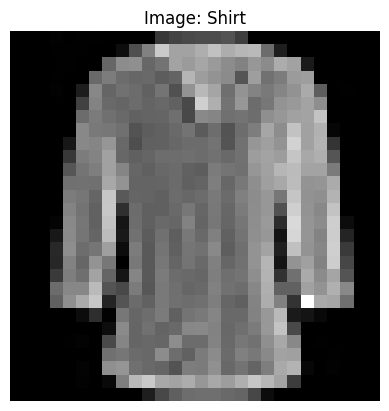

In [71]:
import matplotlib.pyplot as plt

# Récupérer une image et son étiquette
x, y = test_data[4][0], test_data[4][1]

plt.imshow(x[0], cmap="gray")  
plt.title(f"Image: {classes[y]}") 
plt.axis('off') 
plt.show()


In [ ]:
model.eval()

with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Shirt", Actual: "Shirt"


##  Architecture pré-entraînée



- Les architectures pré-entraînées sont des modèles de réseaux neuronaux qui ont été entraînés sur de grands jeux de données et qui peuvent être réutilisés pour d'autres tâches de manière plus rapide et efficace. 

- Ce processus fait partie de ce que l'on appelle le transfer learning (apprentissage par transfert). 
- Ces modèles peuvent être adaptés pour résoudre des tâches spécifiques avec moins de données et moins de temps d'entraînement.

### avantages d'utilisation d'architectures pré-entraînées

- Réduction du temps d'entraînement
- Meilleure performance avec moins de données 
- Exploitation des grandes bases de données 
- Amélioration de la généralisation et la performence 

## Exemple de modèles pré-entraînés populaires pour la classification d'image

### [AlexVet](https://pytorch.org/hub/pytorch_vision_alexnet/)

Unréseau neuronal convolutif profonds qui a révolutionné la vision par ordinateur en gagnant le défi ImageNet 2012. conçue par Alex Krizhevsky, Ilya Sutskever et leur directeur de thèse Geoffrey Hinton.

+ (+) Simple et facile à comprendre
+ (-) Moins performant que les modèles modernes

### [VGG](https://pytorch.org/vision/stable/models/vgg.html) ,`vgg11`, `vgg13`, `vgg16`, `vgg19` 
 Introduit en 2014, ces modèles utilisent de nombreuses petites couches convolutives (3x3) empilées, jusqu'à 19 couches
Les variantes *_bn incluent Batch Normalization pour améliorer la stabilité.

+ (+) Simple 
+ (-) computationnellement coûteux.

### [ResNet](https://pytorch.org/vision/main/models/resnet.html) `resnet18`, `resnet34`, `resnet50`, `resnet101`, `resnet152`
 Un réseau neuronal résiduel, très profond avec des centaines de couches, beaucoup plus profond que les réseaux neuronaux précédents.
 
 + (+) Très performant 
 + (-) Les variantes plus profondes (comme `resnet101`) nécessitent beaucoup de mémoire GPU
 
### [DenseNet](https://pytorch.org/vision/main/models/densenet.html)  `densenet121`, `densenet169`, `densenet201`, `densenet161`
 Une architecture qui connecte chaque couche à toutes les autres couches précédentes, permettant une meilleure propagation des gradients.
 + (+) Utilise mieux la mémoire
 
### [EfficientNet](https://pytorch.org/vision/main/models/efficientnet.html) `efficientnet_b0` à `efficientnet_b7`

### [SqueezeNet](https://pytorch.org/vision/main/models/efficientnet.html)
### [ Vision Transformers (ViT)](https://pytorch.org/vision/main/models/vision_transformer.html)`vit_b_16`, `vit_b_32`, `vit_l_16`, `vit_l_32`, `vit_h_14`

Exemple


In [76]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision

In [79]:
from torchvision import datasets, transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64  
training_data = datasets.CIFAR10(root="./data", train=True, transform= ToTensor(),download=True)
test_data = datasets.CIFAR10(root="./data", train=False, transform= ToTensor(), download=True)

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [80]:
# Charger le modèle préentraîné ResNet18
model = models.resnet18(pretrained=True)

# Geler les poids des couches initiales
for param in model.parameters():
    param.requires_grad = False

print(model)

c:\Users\elbaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\elbaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\elbaz/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:04<00:00, 9.59MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(in_features=512, out_features=10, bias=True)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.484614  [   64/50000]
loss: 1.996074  [ 6464/50000]
loss: 1.728667  [12864/50000]
loss: 1.556884  [19264/50000]
loss: 1.525620  [25664/50000]
loss: 1.507596  [32064/50000]
loss: 1.585723  [38464/50000]
loss: 1.474803  [44864/50000]
Test Error: 
 Accuracy: 42.0%, Avg loss: 1.658919 

Epoch 2
-------------------------------
loss: 1.709906  [   64/50000]
loss: 1.593367  [ 6464/50000]
loss: 1.575489  [12864/50000]
loss: 1.684505  [19264/50000]
loss: 1.898973  [25664/50000]
loss: 1.636399  [32064/50000]
loss: 1.533756  [38464/50000]
loss: 1.403286  [44864/50000]
Test Error: 
 Accuracy: 43.5%, Avg loss: 1.647426 

Epoch 3
-------------------------------
loss: 1.676234  [   64/50000]
loss: 1.767426  [ 6464/50000]
loss: 1.574307  [12864/50000]
loss: 1.799868  [19264/50000]
loss: 1.745940  [25664/50000]
loss: 1.523914  [32064/50000]
loss: 1.292014  [38464/50000]
loss: 1.600579  [44864/50000]
Test Error: 
 Accuracy: 44.6%, Avg loss: 1.601803 

Epoc

## Modèles Préentraînés Disponibles dans TorchText pour le traitement du langage naturel 

### [RobertaBundle](https://pytorch.org/text/stable/models.html)
est une classe dans TorchText qui fournit un moyen pratique d'accéder à des modèles préentraînés basés sur l'architecture RoBERTa

### [XLM-RoBERTa](https://pytorch.org/text/stable/tutorials/sst2_classification_non_distributed.html)

XLM-RoBERTa est une version multilingue de RoBERTa, conçue pour traiter plusieurs langues 

### [GloVe ](https://pytorch.org/text/stable/vocab.html)
pour des tâches générales comme la classification de texte.
### [FastText](https://pytorch.org/text/stable/vocab.html)
pour des langues complexes ou des tâches nécessitant des sous-mots.
### [CharNGram](https://pytorch.org/text/stable/vocab.html)
pour des tâches spécialisées où la structure des mots est critique.
